# Link prediction project for paper citations
## Preprocessing


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random as rand
import csv
from sklearn.utils import shuffle
import gensim
from gensim.models import Word2Vec
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

In [2]:
# Data preparation

dataset = pd.read_csv('datasets/edgelist.txt', sep = ',' ,header = None)


# add names to columns for easier manipulation of data
dataset.columns = ['nodes','edges']

print(dataset.head())

# check for nan values
dataset.isnull().values.any()

   nodes  edges
0      0      1
1      0      2
2      1      3
3      1      5
4      1      6


False

### Graph creation and plot

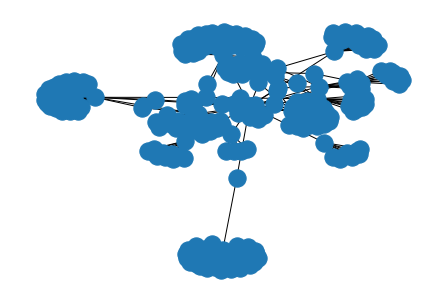

In [3]:
Graph = nx.Graph()

# add nodes

for x in dataset['nodes']:
    Graph.add_node(x)

# add edges

for x,y in dataset.itertuples(index = False):
    Graph.add_edge(x,y)
    
    

# creation of sub graph for plotting 

subset_data = pd.DataFrame(columns = ['nodes','edges'])

subset_data = dataset.head(300)

subG = nx.Graph()

for x in subset_data['nodes']:
    subG.add_node(x)
    
for x,y in subset_data.itertuples(index = False):
    subG.add_edge(x,y)
    
# plot graph

nx.draw(subG)

plt.show()

## Feature Extraction

In [48]:
m = Graph.number_of_edges()
nodeCount = Graph.number_of_nodes()
n = 8 # number of features

X_train = np.zeros((2*m,n))
y_train = np.zeros(2*m)



"""
for i in range(0,m):
    X_train[i,0] = Graph.degree[dataset['nodes'][i]] # degree of first node
    X_train[i,1] = Graph.degree[dataset['edges'][i]] # degree of second node
    X_train[i,2] = X[i,0] + X[i,1] # sum of these degrees


for i in range(m,2*m): # we take all unconnected pairs for negative sample 
    X_train[i,0] = 138499 - X[i-m,0] # Graph.degree[dataset['nodes'][rand.randint(0,m-1)]]
    X_train[i,1] = 138499 - X[i-m,1] # Graph.degree[dataset['edges'][rand.randint(0,m-1)]]
    X_train[i,2] = X[i,0] + X[i,1]

"""

# Read the abstract of each paper

abstracts = dict()
with open('datasets/abstracts.txt', 'r', encoding = 'utf8') as f:
    for line in f:
        node, abstract = line.split('|--|')
        abstracts[int(node)] = abstract
        
for node in abstracts:
    abstracts[node] = set(abstracts[node].split())

# Read the authors of each paper

authors = dict()
with open('datasets/authors.txt', 'r', encoding = 'utf8') as f:
    for line in f:
        node, author = line.split('|--|')
        authors[int(node)] = author        
        
for node in authors:
    authors[node] = authors[node].strip("\n")
    #authors[node] = authors[node].replace(',',' ')
    authors[node] = set(authors[node].split(","))
    
print("Arrays created successfully.")

# Author graph creation

authorGraph = nx.Graph()



for i,edge in enumerate(Graph.edges()):
    result = authors[edge[0]].intersection(authors[edge[1]])
    
    # for word in result: just in case
    for word3 in authors[edge[1]]:
        authorGraph.add_node(word3)
    
    for word in authors[edge[0]]:
        authorGraph.add_node(word)
        if result:
            for word2 in authors[edge[1]]:
                if word == word2:
                    continue
                else:
                    authorGraph.add_edge(word,word2)
                   

    
        
print(authorGraph.degree['Jian-Xun Peng'])

print("Author graph created successfully.")


authorDeg = np.zeros((m,2))
sum0 = 0
sum1 = 0

for i,edge in enumerate(Graph.edges()):
    for word in authors[edge[0]]:
        sum0 += authorGraph.degree[word]
    for word2 in authors[edge[1]]:
        sum1 += authorGraph.degree[word2]
    authorDeg[i,0] = sum0
    authorDeg[i,1] = sum1
    sum0 = 0
    sum1 = 0

#for i,edge in enumerate(authorGraph.edges()):
    #authorDeg.append(authorGraph.degree[i])

Arrays created successfully.
12
Author graph created successfully.


## Model creation and evaluation

In [49]:
# kapws na vrw : len(abstracts[edge[0]].intersection(authors[edge[1]]))    
   
# possible feature : CBOW model me vectors abstract[edge[0]] kai abstract[edge[1]] px , pairnoume
# to cosine similarity ws feature sto Xtrain.
    
# Features :
# (1) sum of number of unique terms of the two nodes' abstracts
# (2) absolute value of difference of number of unique terms of the two nodes' abstracts
# (3) number of common terms between the abstracts of the two nodes
# (4) sum of degrees of graph nodes
# (5) absolute value of degrees of graph nodes
# (6) Check if an author that exists in the left node's abstract , also exists in the right node's authors list.
# (7) Cosine similarity between two abstracts
# (8) sum of Author graph degrees
# (9) absolute value of difference of author graph degrees.

sim = 0
sim2 = 0
sim3 = 0

#absSet = list(map(list,abstracts.values()))
    
#model1 = Word2Vec(absSet,min_count = 1, vector_size = 100)
#sim4 = model1.wv.most_similar(positive = absSet[0])

print("Hello")
"""
for i,edge in enumerate(Graph.edges()):
    # CBOW testing
    #abslist0 = list(abstracts[edge[0]])
    #abslist1 = list(abstracts[edge[1]])
    
    if len(abstracts[edge[0]]) == 0 or len(abstracts[edge[1]]) == 0:
        continue
    else:
        #model1 = Word2Vec(abstracts[edge[0]], min_count = 1,vector_size = 10)
        sim = model1.wv.n_similarity(abstracts[edge[0]],abstracts[edge[1]])

    simContainer.append(sim)
"""


for i,edge in enumerate(Graph.edges()):
    
    # CBOW testing
    """
    if len(abstracts[edge[0]]) == 0 or len(abstracts[edge[1]]) == 0:
        continue
    else:
        #model1 = Word2Vec(abstracts[edge[0]], min_count = 1,vector_size = 10)
        sim = model1.wv.n_similarity(abstracts[edge[0]],abstracts[edge[1]])
    """
    
    # an edge
    X_train[i,0] = len(abstracts[edge[0]]) + len(abstracts[edge[1]])
    X_train[i,1] = abs(len(abstracts[edge[0]]) - len(abstracts[edge[1]]))
    X_train[i,2] = len(abstracts[edge[0]].intersection(abstracts[edge[1]]))
    X_train[i,3] = Graph.degree[edge[0]] + Graph.degree[edge[1]]
    X_train[i,4] = abs(Graph.degree[edge[0]] - Graph.degree[edge[1]])
    X_train[i,5] = len(authors[edge[0]].intersection(abstracts[edge[1]]))
    X_train[i,6] = authorDeg[i,0] + authorDeg[i,1]
    X_train[i,7] = abs(authorDeg[i,0] - authorDeg[i,1])
    #X_train[i,6] = sim
    
    y_train[i] = 1
    
    
    # a randomly generated pair of nodes
    
    n1 = rand.randint(0, nodeCount-1)
    n2 = rand.randint(0, nodeCount-1)
    """
    randabslist0 = list(abstracts[n1])
    randabslist1 = list(abstracts[n2])
    if len(abstracts[n1]) == 0 or len(abstracts[n2]) == 0:
        continue
    else:
        #model2 = gensim.models.Word2Vec(abstracts[n1], min_count = 1,vector_size = 100, window = 5)
        sim2 = model1.wv.n_similarity(abstracts[n1],abstracts[n2])
    """
    

    X_train[m+i,0] = len(abstracts[n1]) + len(abstracts[n2])
    X_train[m+i,1] = abs(len(abstracts[n1]) - len(abstracts[n2]))
    X_train[m+i,2] = len(abstracts[n1].intersection(abstracts[n2]))
    X_train[m+i,3] = Graph.degree[n1] + Graph.degree[n2]
    X_train[m+i,4] = abs(Graph.degree[n1] - Graph.degree[n2])
    X_train[m+i,5] = len(authors[n1].intersection(abstracts[n2]))
    X_train[m+i,6] = authorDeg[n1,0] + authorDeg[n2,1]
    X_train[m+i,7] = abs(authorDeg[n1,0] - authorDeg[n2,1])
    #X_train[m+i,6] = sim2
    
    y_train[m+i] = 0

# print(degreeArr[abstracts.get(edge[0])])
# 276998 <- 2 * number of nodes
# 221598 80% training data
# 55400 20% testing data
        
        
# use test pairs as X_test data

node_pairs = list()

with open('datasets/test.txt', 'r') as f:
    for line in f:
        t = line.split(',')
        node_pairs.append((int(t[0]), int(t[1])))

        

X_test = np.zeros((len(node_pairs), n))
print(len(node_pairs))

for i,node_pair in enumerate(node_pairs):
    """
    pairAbsList0 = list(abstracts[node_pair[0]])
    pairAbsList1 = list(abstracts[node_pair[1]])
    
    if len(abstracts[node_pair[0]]) == 0 or len(abstracts[node_pair[1]]) == 0:
        continue
    else:
        #model3 = gensim.models.Word2Vec(pairAbsList0, min_count = 1,vector_size = 100, window = 5)
        sim3 = model3.wv.n_similarity(abstracts[node_pair[0]],abstracts[node_pair[1]])
    """
    
    X_test[i,0] = len(abstracts[node_pair[0]]) + len(abstracts[node_pair[1]])
    X_test[i,1] = abs(len(abstracts[node_pair[0]]) - len(abstracts[node_pair[1]]))
    X_test[i,2] = len(abstracts[node_pair[0]].intersection(abstracts[node_pair[1]]))
    X_test[i,3] = Graph.degree[node_pair[0]] + Graph.degree[node_pair[1]]
    X_test[i,4] = abs(Graph.degree[node_pair[0]] - Graph.degree[node_pair[1]])
    X_test[i,5] = len(authors[node_pair[0]].intersection(abstracts[node_pair[1]]))
    X_test[i,6] = authorDeg[node_pair[0],0] + authorDeg[node_pair[1],1]
    X_test[i,7] = abs(authorDeg[node_pair[0],0] - authorDeg[node_pair[1],1])
    #X_test[i,6] = sim3
    
# shuffle train data

X_train, y_train = shuffle(X_train, y_train)
    
# Testing Logistic Regression model

lr = LogisticRegression(solver='liblinear',C=10.0,random_state=0)

model = lr.fit(X_train,y_train)

print("Model fitted successfully.")

Hello
106692
Model fitted successfully.


## Naive Bayes Classifier

In [29]:
# Naive Bayes Classifier model
# at this point best NB is the Categorical one with 0.52 log loss

NB = CategoricalNB()
NBmodel = NB.fit(X_train,y_train)

nby_pred = NBmodel.predict_proba(X_test)
#for i in range(0,10):
   # print(nby_pred)
print(nby_pred.shape)
nby_pred = nby_pred[:,1]

# NB CSV creation

predictions = zip(range(len(nby_pred)), nby_pred)
with open("submission_NB_csv.csv","w" , newline = '') as pred:
    csv_out = csv.writer(pred)
    csv_out.writerow(['id','predicted'])
    for row in predictions:
        csv_out.writerow(row)
        

binarray = np.zeros(len(X_test))
mean = np.mean(X_test)

for i in range(0,len(X_test)):
    meanTuple = np.mean(X_test[i])
    if meanTuple > mean:
        binarray[i] = 1
    else:
        binarray[i] = 0
        
print(log_loss(binarray,nby_pred))

(106692, 2)
2.5257012133231846


## Testing cell

In [51]:
wordList = ()

abstracts1 = dict()
with open('datasets/abstracts.txt', 'r', encoding = 'utf8') as f:
    for line in f:
        node, abstract = line.split('|--|')
        abstracts1[int(node)] = abstract

for node in abstracts1:
    abstracts1[node] = set(abstracts1[node].split()) 

# word frequency


"""

string = abstracts1[3]
str_list = string.split()
unique_words = set(str_list)

for word in unique_words:
    if len(word) >= 3 and len(word) <= 6:
        continue
        #print(word)

# 3 , 2214
# 11042 11239

#for word in unique_words:
    #print('Frequency of ', word , 'is :', str_list.count(word))
        
#print(abstracts1[3]) 

"""
for i in range(0,10):
    print(X_test[i][6])

    
#print(abstracts[134761])
#for word in authors[2559]:
   # word = word.split()
   # print(word)
#abslist = list(abstracts[0])

#print(abstracts[0])
#sim5 = model1.wv.most_similar(absSet[1])
#print(sim5)
#print(authors[2559])
#result = abstracts1[134761].intersection(authors[2559])
#print(result)
# prwta 5 stoixeia tou CSV
# 0	0.976707924
# 1	0.144358737
# 2	0.957898003
# 3	0.192365151
# 4	0.245021383
# 5	0.775259045
print(type(abstracts))

922.0
938.0
234.0
621.0
352.0
833.0
915.0
1112.0
1844.0
419.0
<class 'dict'>


## CSV creation 

In [53]:
# predict citation

y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]

# create csv

predictions = zip(range(len(y_pred)), y_pred)
with open("submission_csv.csv","w" , newline = '') as pred:
    csv_out = csv.writer(pred)
    csv_out.writerow(['id','predicted'])
    for row in predictions:
        csv_out.writerow(row)

## local Log Loss Computation

In [54]:
# Log loss computation


#binarray = np.zeros((len(X_test),n))
binarray = np.zeros(len(X_test))
mean = np.mean(X_test)

for i in range(0,len(X_test)):
    meanTuple = np.mean(X_test[i])
    if meanTuple > mean:
        binarray[i] = 1
    else:
        binarray[i] = 0
        
print(log_loss(binarray,y_pred))

1.2950478301189976
